### **Assigment_2_ML_K-Means**

# Import the dataset in google collab using pandas.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML/K-Means Codes/Mall_Customers.csv')

In [4]:
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Perform K-means clustering on the dataset

In [13]:
# Selecting the features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [14]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Calculating WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


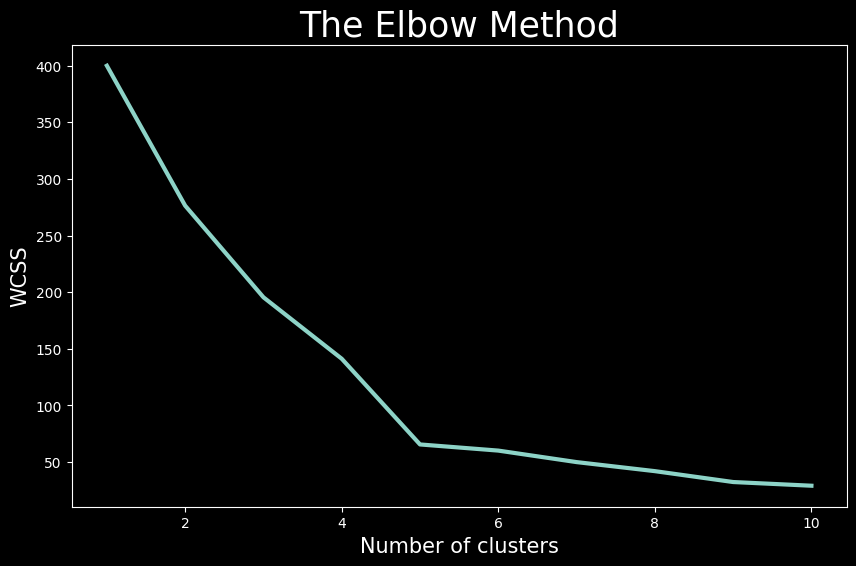

In [16]:
# Plotting the WCSS to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, lw=3)
plt.title('The Elbow Method', fontsize=25)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('WCSS', fontsize=15)
plt.show()

Looking at the elbow plot that turned out, it seems like the elbow point, where the decrease in WCSS becomes less sharp, could be around 4 clusters. This point suggests that increasing the number of clusters beyond 4 doesn't result in significantly better modeling of the data, as the reduction in WCSS slows down considerably.

## Fit K-means with the Optimal Number of **Clusters**


In [17]:
kmeans_optimal = KMeans(n_clusters=4, init='k-means++', n_init='auto', random_state=42)
y_pred = kmeans_optimal.fit_predict(X_scaled)

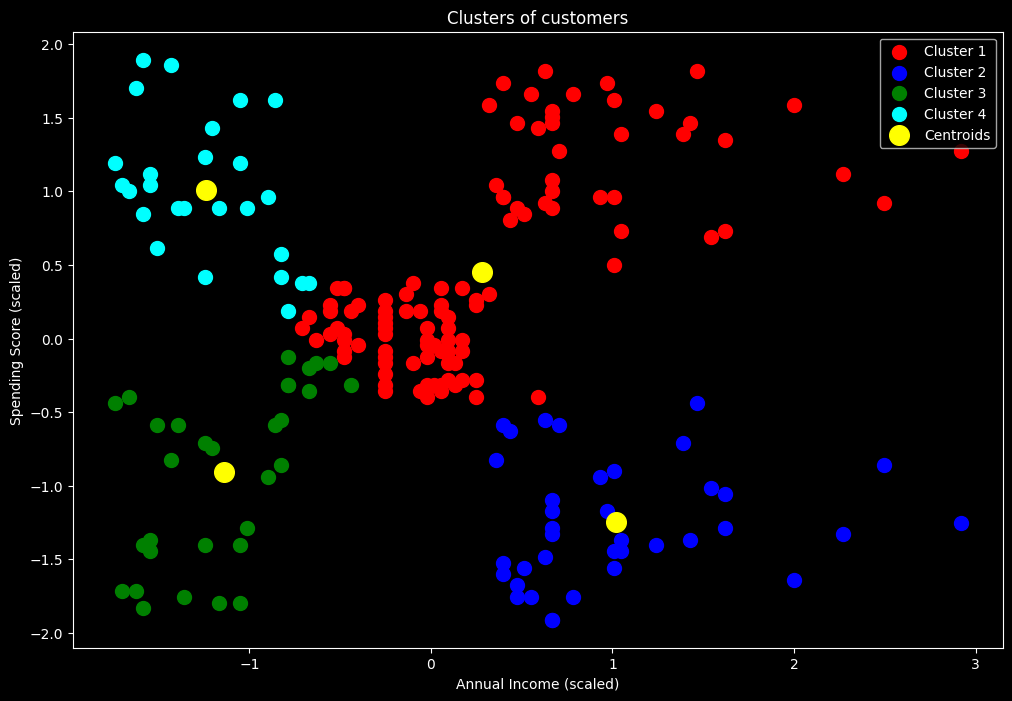

In [19]:
# Visualizing the clusters
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'cyan']
for i in range(4):
    plt.scatter(X_scaled[y_pred == i, 0], X_scaled[y_pred == i, 1], s=100, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

## **Clustering Performance using Calinski-Harabasz Index**

In [24]:
import sklearn
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(X_scaled, y_pred)
print("Calinski-Harabasz Index for 4 clusters:", ch_score)

Calinski-Harabasz Index for 4 clusters: 173.92106117753946


In [26]:
# differently:
import sklearn
from sklearn.metrics import calinski_harabasz_score
kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init='auto', random_state = 42)
y_pred = kmeans.fit_predict(X)
sklearn.metrics.calinski_harabasz_score(X, y_pred)


173.41359380786457

**173 Score:** This is relatively high, suggesting that the 4 clusters are quite distinct from each other, with minimal overlap and substantial separation. Each cluster is likely to be dense, meaning that the points within each cluster are close to each other, while being far from points in other clusters.